# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">🟠Medical Cost Prediction🟠</p>

### This dataset is derived from the book "Machine Learning with R" by Brett Lantz, offering an introduction to machine learning using the R programming language. It is important to note that the original datasets are typically not available online unless you purchase the book and create a user account with Packt Publishing. However, this dataset has been created by cleaning up and recoding publicly available data to match the format presented in the book.


<center><span style="color:#f7c297;font-family:cursive;font-size:100%"> </span></center>
<center><img src="https://i.imgur.com/21ryJ6s.png" width="800" height="800"></center>

<div style="border-radius: 10px; border: #6B8E23 solid; padding: 15px; background-color: #F5F5DC; font-size: 100%; text-align: left">

<h3 align="left"><font color='#556B2F'>👀 Features : </font></h3>
   
1- **Age:** Age of the primary beneficiary.

2- **Sex:** Gender of the insurance contractor, with values "female" or "male."

3- **Bmi:** Body mass index, a numerical indicator of body weight relative to height. It is calculated as weight in kilograms divided by the square of height in meters. Ideally, a BMI between 18.5 and 24.9 is considered normal.

4- **Children:** The number of children covered by health insurance or the number of dependents.

5- **Smoker:** Smoking status of the individual, indicated as either a smoker or non-smoker.

6- **Region:** The beneficiary's residential area in the United States, with options including northeast, southeast, southwest, and northwest.

7- **Charges:** Individual medical costs billed by health insurance.

In [239]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [240]:
#reading our csv's for train,test,sub,original
df = pd.read_csv("/kaggle/input/insurance/insurance.csv")

In [241]:
#looking first 5 of our train
df.head().T

,0,1,2,3,4
age,19,18,28,33,32
sex,female,male,male,male,male
bmi,27.9,33.77,33.0,22.705,28.88
children,0,1,3,0,0
smoker,yes,no,no,no,no
region,southwest,southeast,southeast,northwest,northwest
charges,16884.924,1725.5523,4449.462,21984.47061,3866.8552


In [242]:
print(df.shape)

(1338, 7)


In [243]:
print(df.isnull().values.any())

False


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* **Null Values: total number of null values present in our data**
 
* Our data set have no missing value

* **Total samples of data: number of rows provided**

* Our dataset  have 1338 rows, 7 columns


In [244]:
df.describe([0.01, 0.99]).T

,count,mean,std,min,1%,50%,99%,max
age,1338.0,39.207025,14.049960,18.0000,18.00000,39.000,64.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,17.89515,30.400,46.407900,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,5.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,1252.97273,9382.033,48537.480726,63770.42801


In [245]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">EDA and Cleaning Data</p>

In [246]:
#We 1 duplicated in our data, lets drop
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [247]:
df.drop_duplicates(inplace=True)

In [248]:
#resetting index since we dropped some duplicated
df.reset_index(drop=True)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [249]:
num_cols = [col for col in df.columns if (df[col].dtype in ["int64","float64"]) & (df[col].nunique()>50)]
num_cols.pop()

'charges'

In [250]:
target = df["charges"]

In [251]:
df["charges_Range"] = pd.cut(df["charges"], 
                                 bins=[0,5000,15000,30000,np.inf], 
                                 labels=["D","C","B","A"],
                                include_lowest=True)

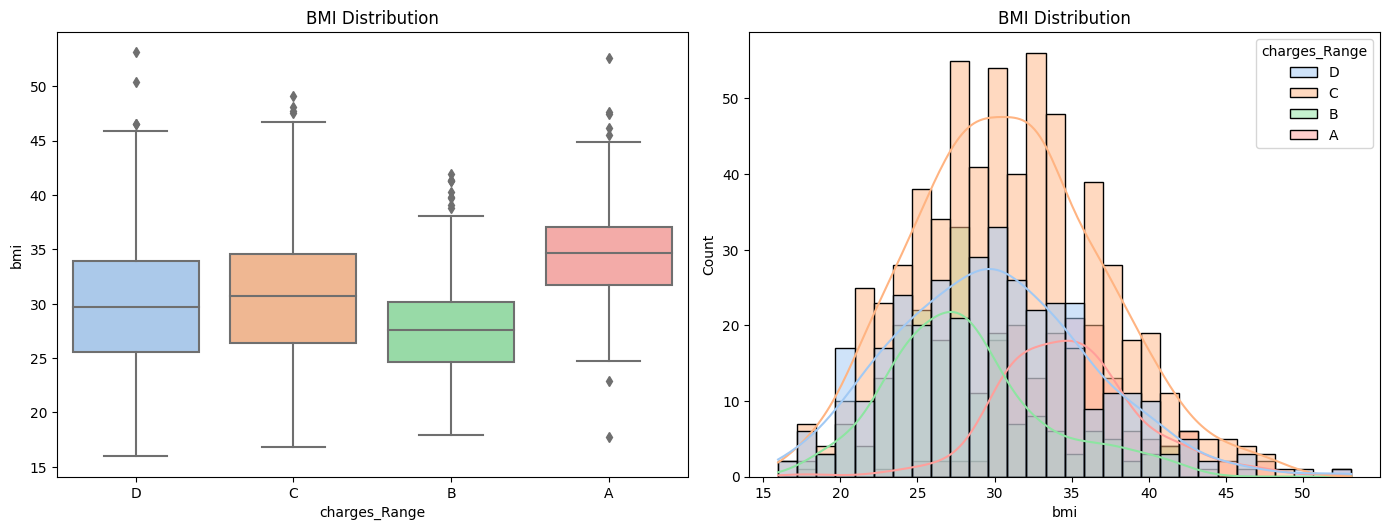

In [252]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
sns.boxplot(x="charges_Range", y="bmi", data=df,palette="pastel")
plt.title(f"BMI Distribution")
plt.subplot(2,2,2)
sns.histplot(x="bmi", hue="charges_Range", data=df,bins=30,kde=True, palette="pastel")
plt.title(f"BMI Distribution")
plt.tight_layout()

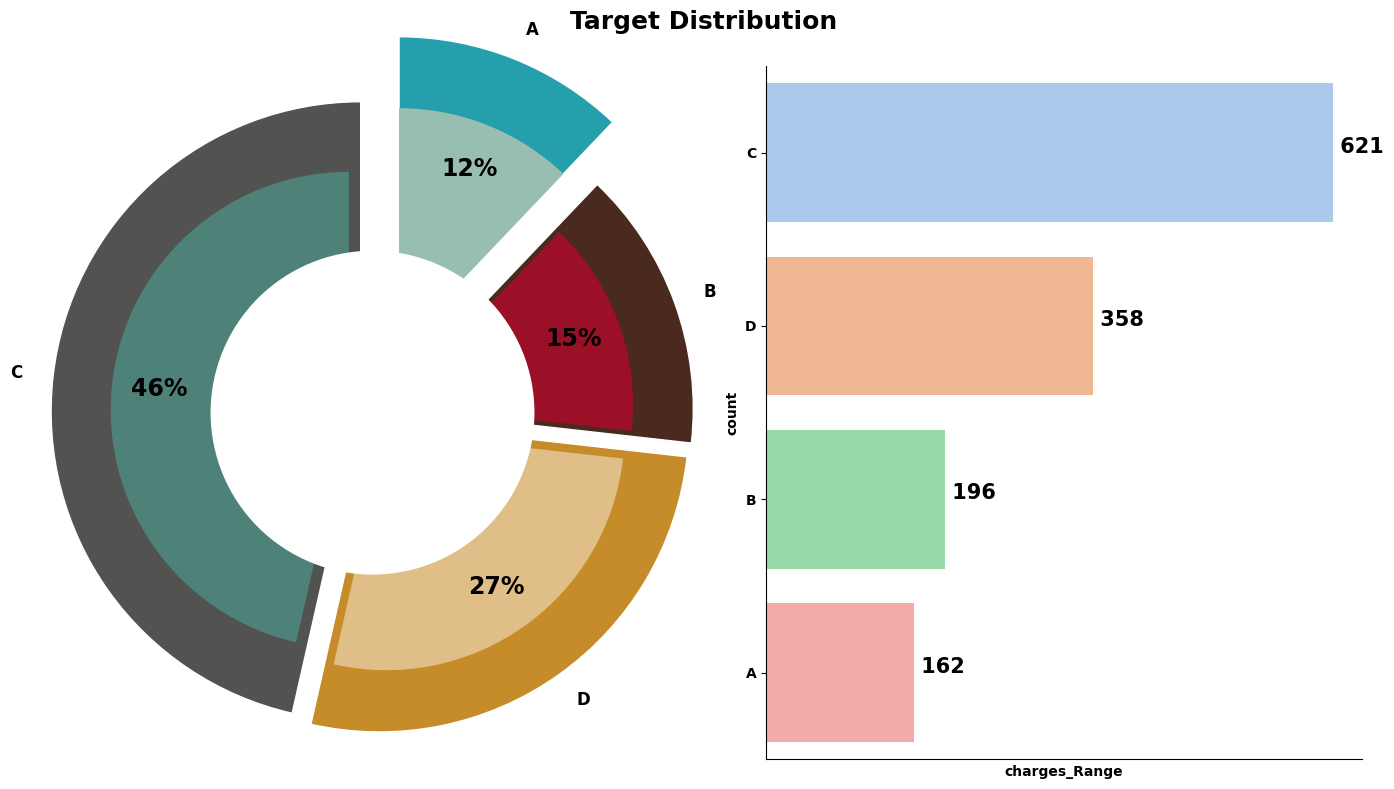

In [253]:
# https://www.kaggle.com/code/kimtaehun/eda-and-baseline-with-multiple-models
def plot_count(df: pd.core.frame.DataFrame, col: str, title_name: str='Train') -> None:
    # Set background color
    
    f, ax = plt.subplots(1, 2, figsize=(14, 8))
    plt.subplots_adjust(wspace=0.2)

    s1 = df[col].value_counts()
    N = len(s1)

    outer_sizes = s1
    inner_sizes = s1/N

    outer_colors = ['#525250', '#C68C2A','#4A291E', '#269FAC', '#FF9074']
    inner_colors = ['#4E8278', '#DFBF87','#9C1027', '#98BDB1', '#FECA8B']

    ax[0].pie(
        outer_sizes,colors=outer_colors, 
        labels=s1.index.tolist(), 
        startangle=90, frame=True, radius=1.3, 
        explode=([0.05]*(N-1) + [.3]),
        wedgeprops={'linewidth' : 1, 'edgecolor' : 'white'}, 
        textprops={'fontsize': 12, 'weight': 'bold'}
    )

    textprops = {
        'size': 17, 
        'weight': 'bold', 
        'color': 'black'
    }

    ax[0].pie(
        inner_sizes, colors=inner_colors,
        radius=1, startangle=90,
        autopct='%1.f%%', explode=([.1]*(N-1) + [.3]),
        pctdistance=0.8, textprops=textprops
    )

    center_circle = plt.Circle((0,0), .68, color='black', fc='white', linewidth=0)
    ax[0].add_artist(center_circle)

    x = s1
    y = s1.index.tolist()
    sns.barplot(
        x=x, y=y, ax=ax[1],
        palette='pastel', orient='horizontal'
    )

    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].tick_params(
        axis='x',         
        which='both',      
        bottom=False,      
        labelbottom=False
    )

    for i, v in enumerate(s1):
        ax[1].text(v, i, " "+str(v), color='black', fontweight='bold', fontsize=15)

    plt.setp(ax[1].get_yticklabels(), fontweight="bold")
    plt.setp(ax[1].get_xticklabels(), fontweight="bold")
    ax[1].set_xlabel(col, fontweight="bold", color='black')
    ax[1].set_ylabel('count', fontweight="bold", color='black')

    f.suptitle(f'{title_name}', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

plot_count(df, 'charges_Range', 'Target Distribution')

In [254]:
df.drop("charges_Range", axis=1,inplace=True)

# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">Feature Engineering</p>

In [255]:
cat_cols = [col for col in df.columns if df[col].nunique()<6]
cat_cols

['sex', 'smoker', 'region']

In [256]:
df = pd.get_dummies(df,columns=cat_cols, drop_first=True, dtype="int")

# <p style="background-color:lightgray; font-family:verdana; font-size:250%; text-align:center; border-radius: 15px 20px;">Modeling</p>

In [257]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import median_absolute_error
X = df.drop("charges", axis=1)
y = df["charges"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 4118)

233.19804867568712

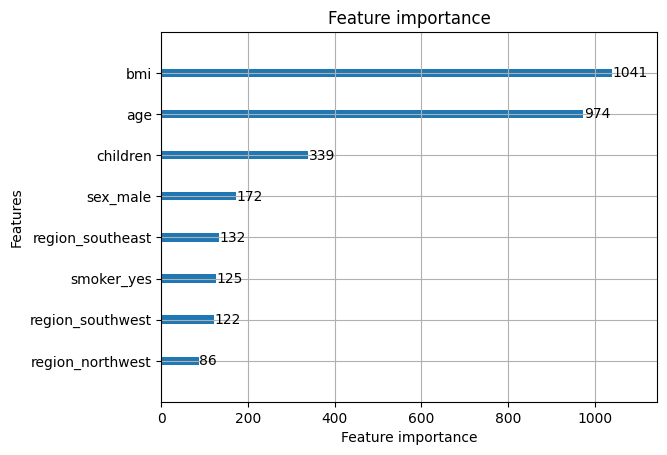

In [258]:
import lightgbm
lgb = lightgbm.LGBMRegressor(objective = 'mae')
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
median_absolute_error(y_test,lgb.predict(X_test))

1333.1360136718736

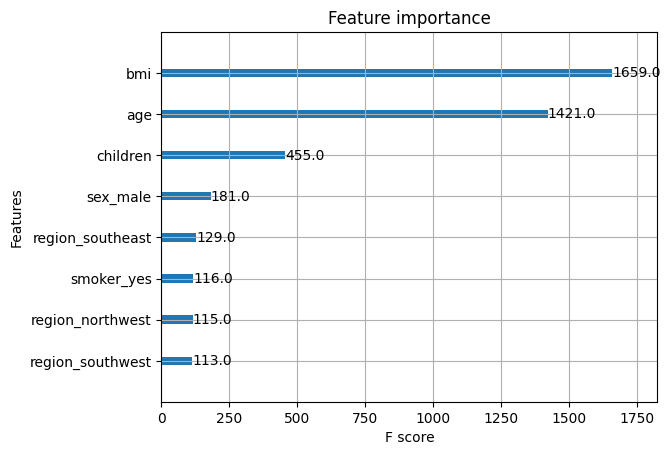

In [259]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgboost.plot_importance(xgb);
median_absolute_error(y_test,xgb.predict(X_test))

In [260]:
from lightgbm import LGBMRegressor
import optuna

def objective_lgb(trial):
    """Define the objective function"""

    params = {
        'objective': trial.suggest_categorical('objective', ['mae']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 0.9),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
    }


    model_lgb = LGBMRegressor(**params)
    model_lgb.fit(X_train, y_train)
    y_pred = model_lgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [261]:
study_lgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_lgb.optimize(objective_lgb, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [262]:
# Print the best parameters
print('Best parameters', study_lgb.best_params)

Best parameters {'objective': 'mae', 'max_depth': 3, 'min_child_samples': 9, 'learning_rate': 0.044436564118149814, 'n_estimators': 647, 'min_child_weight': 8, 'subsample': 0.30321635796628343, 'colsample_bytree': 0.9384725450868199, 'reg_alpha': 0.39512741999124834, 'reg_lambda': 0.08327811801817955, 'seed': 42}


In [263]:
lgb = LGBMRegressor(**study_lgb.best_params)
lgb.fit(X_train, y_train)
y_pred = lgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  115.9379461205458


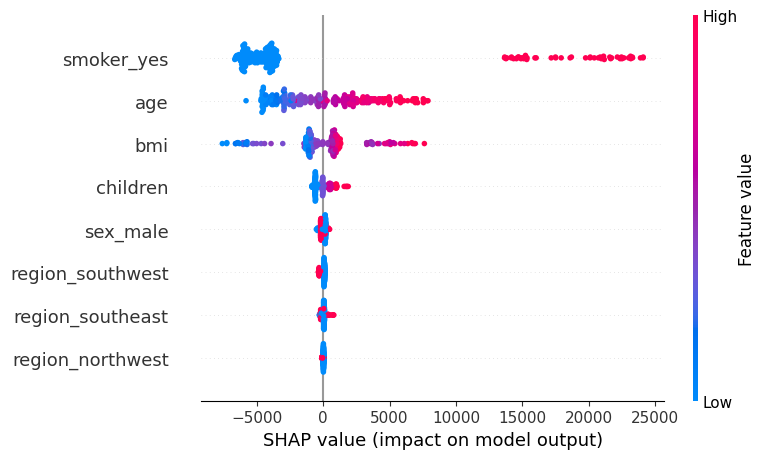

In [264]:
import shap 
explainer = shap.TreeExplainer(lgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [265]:
from xgboost import XGBRegressor
import optuna
def objective_xg(trial):
    """Define the objective function"""

    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.05),
        'n_estimators': trial.suggest_int('n_estimators', 300, 1000),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.3, 0.9),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        "seed" : trial.suggest_categorical('seed', [42]),
        'objective': trial.suggest_categorical('objective', ['reg:absoluteerror']),
    }
    model_xgb = XGBRegressor(**params)
    model_xgb.fit(X_train, y_train)
    y_pred = model_xgb.predict(X_test)
    return median_absolute_error(y_test,y_pred)

In [266]:
study_xgb = optuna.create_study(direction='minimize')
optuna.logging.set_verbosity(optuna.logging.WARNING)
study_xgb.optimize(objective_xg, n_trials=50,show_progress_bar=True)

  0%|          | 0/50 [00:00<?, ?it/s]

In [267]:
# Print the best parameters
print('Best parameters', study_xgb.best_params)

Best parameters {'booster': 'gbtree', 'max_depth': 3, 'learning_rate': 0.04074235056577225, 'n_estimators': 887, 'min_child_weight': 9, 'gamma': 9.333142813570155e-06, 'subsample': 0.3812611871019646, 'reg_alpha': 0.2731987099075296, 'reg_lambda': 0.0545099984689247, 'seed': 42, 'objective': 'reg:absoluteerror'}


In [268]:
xgb = XGBRegressor(**study_xgb.best_params)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

print('Error: ', median_absolute_error(y_test, y_pred))

Error:  116.50935859375022


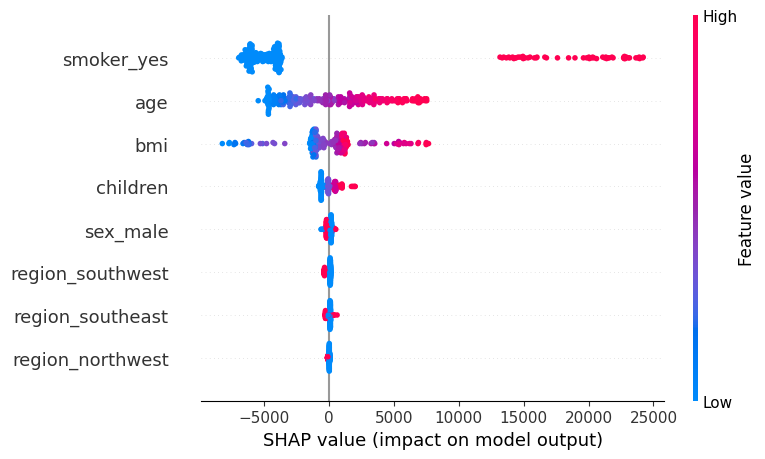

In [269]:
import shap 
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)